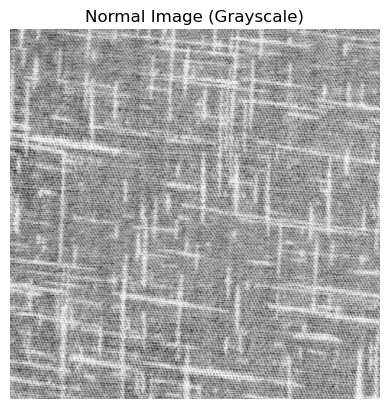

Normal Image - 3x3 Top-left Window Values:
 [[223 228 225]
 [207 214 219]
 [199 205 213]]
Normal Image - Image shape: (512, 512)
Normal Image - Number of channels: 1
-----



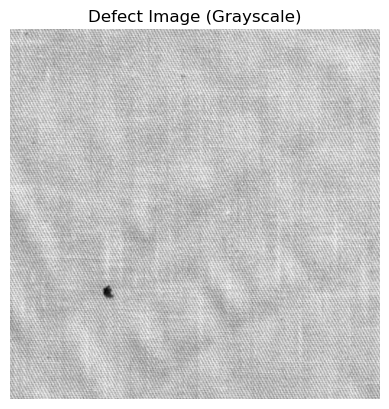

Defect Image - 3x3 Top-left Window Values:
 [[194 225 214]
 [165 202 204]
 [174 206 220]]
Defect Image - Image shape: (512, 512)
Defect Image - Number of channels: 1
-----



In [33]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set paths
normal_folder =r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\normal1'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\defect1'

# Output folders for grayscale images
normal_gray_folder =r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\normal_gray'
defect_gray_folder = r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\defect_gray'

# Create grayscale folders if they don't exist
os.makedirs(normal_gray_folder, exist_ok=True)
os.makedirs(defect_gray_folder, exist_ok=True)

# Function to convert all images in a folder to grayscale
def convert_to_grayscale(input_folder, output_folder):
    for file in os.listdir(input_folder):
        img_path = os.path.join(input_folder, file)
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(img_path).convert('L')  # 'L' = grayscale
            img.save(os.path.join(output_folder, file))

# Convert all images
convert_to_grayscale(normal_folder, normal_gray_folder)
convert_to_grayscale(defect_folder, defect_gray_folder)

# Display first grayscale image from each folder
def display_and_print_details(folder_path, title):
    first_image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = Image.open(first_image_path)
    img_array = np.array(img)

    # Display image
    plt.imshow(img_array, cmap='gray')
    plt.title(f"{title} (Grayscale)")
    plt.axis('off')
    plt.show()

    # Print 3x3 pixel values and number of channels
    print(f"{title} - 3x3 Top-left Window Values:\n", img_array[:3, :3])
    print(f"{title} - Image shape: {img_array.shape}")
    print(f"{title} - Number of channels: {1 if len(img_array.shape)==2 else img_array.shape[2]}")
    print("-----\n")

# Apply display and info function
display_and_print_details(normal_gray_folder, "Normal Image")
display_and_print_details(defect_gray_folder, "Defect Image")


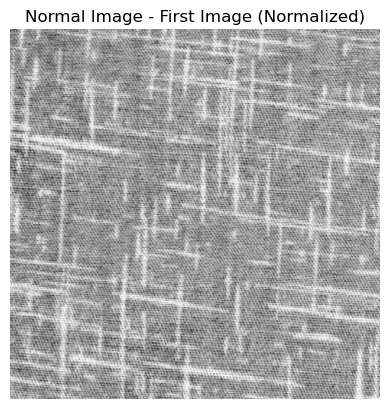

Normal Image - 3x3 Top-left Window (Normalized) Values:
 [[0.8745098  0.89411765 0.88235294]
 [0.81176471 0.83921569 0.85882353]
 [0.78039216 0.80392157 0.83529412]]
Normal Image - Image shape: (512, 512)
Normal Image - Number of channels: 1
-----

Normal Image - Total images processed and saved: 940



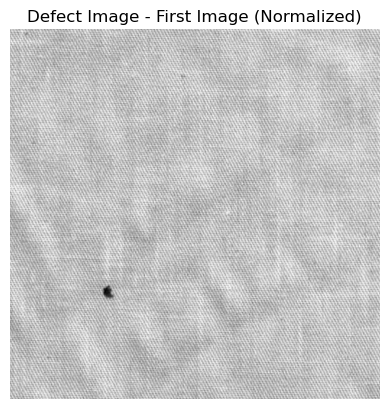

Defect Image - 3x3 Top-left Window (Normalized) Values:
 [[0.76078431 0.88235294 0.83921569]
 [0.64705882 0.79215686 0.8       ]
 [0.68235294 0.80784314 0.8627451 ]]
Defect Image - Image shape: (512, 512)
Defect Image - Number of channels: 1
-----

Defect Image - Total images processed and saved: 95



In [35]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Set paths to final grayscale image folders
normal_gray_folder =r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\normal_gray'
defect_gray_folder = r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\defect_gray'
# Output folders for normalized images
normal_normalized_folder =r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\normal_normalized'
defect_normalized_folder =r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\defect_normalized'

# Create normalized folders if they don't exist
os.makedirs(normal_normalized_folder, exist_ok=True)
os.makedirs(defect_normalized_folder, exist_ok=True)

# Function to normalize grayscale image
def normalize_image(image_array):
    return image_array / 255.0

# Function to process all images in a folder
def process_and_save_all_images(input_folder, output_folder, title):
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))]
    
    if not image_files:
        print(f"No image files found in {input_folder}")
        return
    
    for i, file_name in enumerate(image_files):
        file_path = os.path.join(input_folder, file_name)
        img = Image.open(file_path).convert('L')  # Ensure it's grayscale
        img_array = np.array(img)

        # Normalize
        normalized_array = normalize_image(img_array)

        # Save normalized image (convert back to 8-bit before saving)
        normalized_img = Image.fromarray((normalized_array * 255).astype(np.uint8))
        normalized_img.save(os.path.join(output_folder, file_name))

        # Display and print info for the first image only
        if i == 0:
            plt.imshow(normalized_array, cmap='gray')
            plt.title(f"{title} - First Image (Normalized)")
            plt.axis('off')
            plt.show()
            
            print(f"{title} - 3x3 Top-left Window (Normalized) Values:\n", normalized_array[:3, :3])
            print(f"{title} - Image shape: {normalized_array.shape}")
            print(f"{title} - Number of channels: {1 if len(normalized_array.shape)==2 else normalized_array.shape[2]}")
            print("-----\n")

    print(f"{title} - Total images processed and saved: {len(image_files)}\n")

# Process both normal and defect folders
process_and_save_all_images(normal_gray_folder, normal_normalized_folder, "Normal Image")
process_and_save_all_images(defect_gray_folder, defect_normalized_folder, "Defect Image")


In [37]:
import os
import cv2
import numpy as np
from skimage import restoration, img_as_float, img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# ===============================
# Step 1: Define Folder Paths
# ===============================
normal_input_folder = r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\normal_normalized'
defect_input_folder = r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\defect_normalized'

normal_output_folder = r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\denoised_normal'
defect_output_folder = r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\denoised_defect'

# Create output folders if they don't exist
os.makedirs(normal_output_folder, exist_ok=True)
os.makedirs(defect_output_folder, exist_ok=True)

# ===============================
# Step 2: Define a Function to Process a Folder
# ===============================
def process_folder(input_folder, output_folder):
    """
    Process each image in the input folder (already normalized grayscale images):
    - Apply wavelet denoising using BayesShrink.
    - Compute PSNR and SSIM metrics.
    - Save the denoised image to the output folder.
    """
    # Define valid image extensions
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
    files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    print(f"Found {len(files)} images in {input_folder}...\n")
    
    # Check if any image files are found
    if len(files) == 0:
        print(f"No image files found in folder: {input_folder}")
        return
    
    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)
        
        # Load the normalized grayscale image.
        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Error reading image: {file}. Skipping...")
            continue
        
        img_float = img_as_float(img)  # Now pixel values are in the range [0, 1]
        
        # Apply Wavelet Denoising using BayesShrink
        denoised = restoration.denoise_wavelet(
            img_float, 
            method='BayesShrink', 
            mode='soft', 
            rescale_sigma=True
        )
        
        # Compute PSNR and SSIM
        psnr_value = psnr(img_float, denoised, data_range=1.0)
        ssim_value = ssim(img_float, denoised, data_range=1.0)
        
        # Print PSNR and SSIM values
        print(f"Processing '{file}'")
        print(f"PSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}\n")
        
        # Clip and save the denoised image
        denoised_clipped = np.clip(denoised, 0, 1)
        denoised_uint8 = img_as_ubyte(denoised_clipped)
        
        # Saving the denoised image
        try:
            success = cv2.imwrite(output_path, denoised_uint8)
            if success:
                print(f"Successfully saved: {file}")
            else:
                print(f"Failed to save: {file}")
        except Exception as e:
            print(f"Error saving image {file}: {e}")

# ===============================
# Step 6: Process Both Folders
# ===============================
print("Processing Normal Images...\n")
process_folder(normal_input_folder, normal_output_folder)
print("Processing Defective Images...\n")
process_folder(defect_input_folder, defect_output_folder)



Processing Normal Images...

Found 940 images in C:\Users\Global\Fabric project\WFDD\Yellow cloth\normal_normalized...

Processing 'img1.png'
PSNR: 43.92 dB, SSIM: 0.9859

Successfully saved: img1.png
Processing 'img10.png'
PSNR: 41.66 dB, SSIM: 0.9823

Successfully saved: img10.png
Processing 'img100.png'
PSNR: 42.47 dB, SSIM: 0.9871

Successfully saved: img100.png
Processing 'img1000.png'
PSNR: 34.40 dB, SSIM: 0.9632

Successfully saved: img1000.png
Processing 'img1001.png'
PSNR: 41.23 dB, SSIM: 0.9755

Successfully saved: img1001.png
Processing 'img1002.png'
PSNR: 39.52 dB, SSIM: 0.9644

Successfully saved: img1002.png
Processing 'img1003.png'
PSNR: 39.16 dB, SSIM: 0.9613

Successfully saved: img1003.png
Processing 'img1004.png'
PSNR: 39.07 dB, SSIM: 0.9613

Successfully saved: img1004.png
Processing 'img1005.png'
PSNR: 39.79 dB, SSIM: 0.9667

Successfully saved: img1005.png
Processing 'img1006.png'
PSNR: 36.45 dB, SSIM: 0.9661

Successfully saved: img1006.png
Processing 'img1007.pn

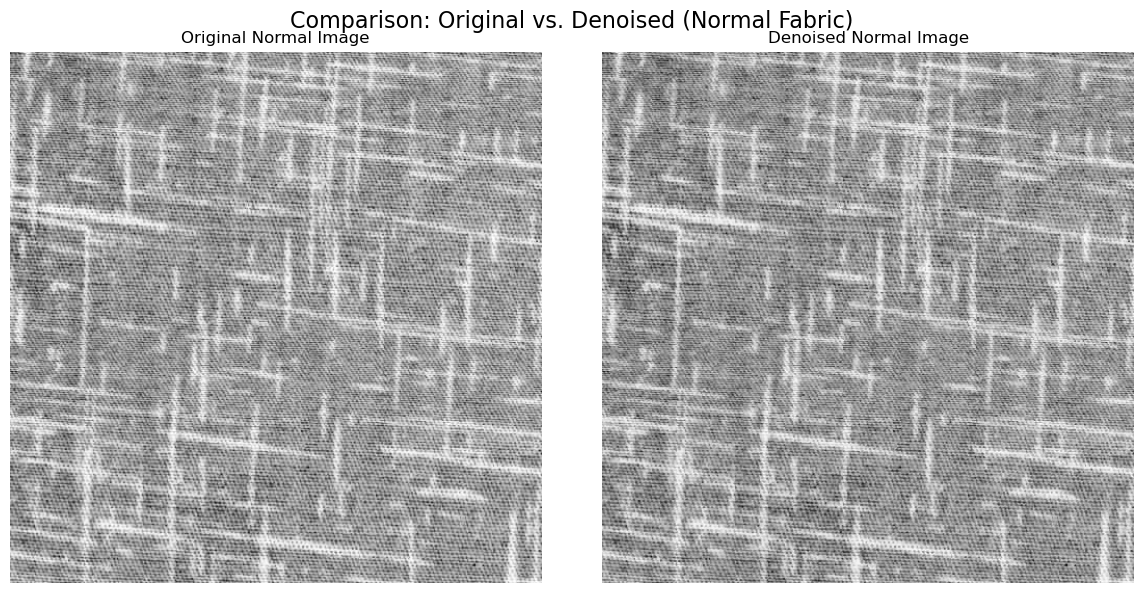

In [39]:
# Step 7: Optional - Visualize a Sample Comparison for Normal Images
# ===============================
# For demonstration, display the first image from the normal folder before and after denoising.
sample_file = os.listdir(normal_input_folder)[0]
sample_input_path = os.path.join(normal_input_folder, sample_file)
sample_output_path = os.path.join(normal_output_folder, sample_file)

orig_sample = cv2.imread(sample_input_path, cv2.IMREAD_GRAYSCALE)
denoised_sample = cv2.imread(sample_output_path, cv2.IMREAD_GRAYSCALE)

# Show before and after denoising images
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orig_sample, cmap='gray')
plt.title("Original Normal Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_sample, cmap='gray')
plt.title("Denoised Normal Image")
plt.axis('off')

plt.suptitle("Comparison: Original vs. Denoised (Normal Fabric)", fontsize=16)
plt.tight_layout()
plt.show()


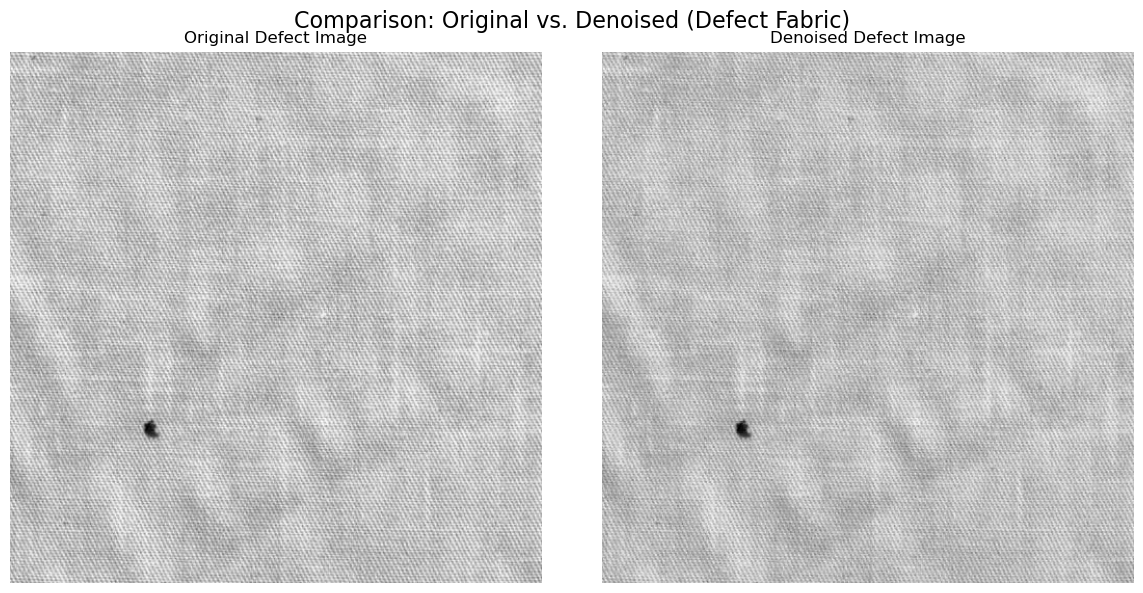

In [41]:
# ===============================
# Step 7 (continued): Visualize a Sample Comparison for Defect Images
# ===============================
# For demonstration, display the first image from the defect folder before and after denoising.
sample_defect_file = os.listdir(defect_input_folder)[0]
sample_defect_input_path = os.path.join(defect_input_folder, sample_defect_file)
sample_defect_output_path = os.path.join(defect_output_folder, sample_defect_file)

orig_defect_sample = cv2.imread(sample_defect_input_path, cv2.IMREAD_GRAYSCALE)
denoised_defect_sample = cv2.imread(sample_defect_output_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orig_defect_sample, cmap='gray')
plt.title("Original Defect Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_defect_sample, cmap='gray')
plt.title("Denoised Defect Image")
plt.axis('off')

plt.suptitle("Comparison: Original vs. Denoised (Defect Fabric)", fontsize=16)
plt.tight_layout()
plt.show()


In [43]:
# ===============================
# Step 8: Modified process_folder to return PSNR and SSIM values
# ===============================
def process_folder_with_metrics(input_folder, output_folder):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
    files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    psnr_values = []
    ssim_values = []

    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        img_float = img_as_float(img)

        denoised = restoration.denoise_wavelet(
            img_float,
            method='BayesShrink',
            mode='soft',
            rescale_sigma=True
        )

        psnr_value = psnr(img_float, denoised, data_range=1.0)
        ssim_value = ssim(img_float, denoised, data_range=1.0)

        print(f"Processing '{file}'")
        print(f"PSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}\n")

        denoised_clipped = np.clip(denoised, 0, 1)
        denoised_uint8 = img_as_ubyte(denoised_clipped)
        cv2.imwrite(output_path, denoised_uint8)

        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)

    return psnr_values, ssim_values

# ===============================
# Step 9: Call Modified Function for Each Folder
# ===============================
print("=== Processing Normal Folder ===")
normal_psnr, normal_ssim = process_folder_with_metrics(normal_input_folder, normal_output_folder)

print("\n=== Processing Defect Folder ===")
defect_psnr, defect_ssim = process_folder_with_metrics(defect_input_folder, defect_output_folder)

# ===============================
# Step 10: Print Average Metrics
# ===============================
print("\n===== Summary =====")
print(f"Normal Folder - Avg PSNR: {np.mean(normal_psnr):.2f} dB, Avg SSIM: {np.mean(normal_ssim):.4f}")
print(f"Defect Folder - Avg PSNR: {np.mean(defect_psnr):.2f} dB, Avg SSIM: {np.mean(defect_ssim):.4f}")


=== Processing Normal Folder ===
Processing 'img1.png'
PSNR: 43.92 dB, SSIM: 0.9859

Processing 'img10.png'
PSNR: 41.66 dB, SSIM: 0.9823

Processing 'img100.png'
PSNR: 42.47 dB, SSIM: 0.9871

Processing 'img1000.png'
PSNR: 34.40 dB, SSIM: 0.9632

Processing 'img1001.png'
PSNR: 41.23 dB, SSIM: 0.9755

Processing 'img1002.png'
PSNR: 39.52 dB, SSIM: 0.9644

Processing 'img1003.png'
PSNR: 39.16 dB, SSIM: 0.9613

Processing 'img1004.png'
PSNR: 39.07 dB, SSIM: 0.9613

Processing 'img1005.png'
PSNR: 39.79 dB, SSIM: 0.9667

Processing 'img1006.png'
PSNR: 36.45 dB, SSIM: 0.9661

Processing 'img1007.png'
PSNR: 38.01 dB, SSIM: 0.9539

Processing 'img1008.png'
PSNR: 33.34 dB, SSIM: 0.9441

Processing 'img1009.png'
PSNR: 32.37 dB, SSIM: 0.9328

Processing 'img101.png'
PSNR: 37.47 dB, SSIM: 0.9668

Processing 'img1010.png'
PSNR: 31.77 dB, SSIM: 0.9300

Processing 'img1011.png'
PSNR: 39.70 dB, SSIM: 0.9645

Processing 'img1012.png'
PSNR: 39.40 dB, SSIM: 0.9645

Processing 'img1013.png'
PSNR: 37.88 dB

In [5]:
import os
import cv2
import numpy as np

# Folder paths
input_folder =  r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\final_normal'  # Replace with your input folder path
output_folder =  r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\final_normal_3'    # Replace with your output folder path

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def grayscale_to_color_normalized(image):
    # Normalize if not already in [0, 1]
    if image.max() > 1.0:
        image = image / 255.0

    # Convert grayscale image to 3-channel normalized image
    color_image = np.stack([image, image, image], axis=-1)
    return color_image

# Process all image files in the folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
        # Read image in grayscale
        gray_path = os.path.join(input_folder, filename)
        gray_image = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

        if gray_image is None:
            print(f"Could not read image: {filename}")
            continue

        # Convert to normalized color image
        color_image_normalized = grayscale_to_color_normalized(gray_image)

        # Optional: Save the normalized image as a visual reference (rescaled for saving)
        color_image_to_save = (color_image_normalized * 255).astype(np.uint8)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, color_image_to_save)

        print(f"Processed and saved: {filename}")

print("All images converted successfully.")


Processed and saved: img1.png
Processed and saved: img10.png
Processed and saved: img100.png
Processed and saved: img1000.png
Processed and saved: img1008.png
Processed and saved: img1009.png
Processed and saved: img101.png
Processed and saved: img1010.png
Processed and saved: img1013.png
Processed and saved: img1017.png
Processed and saved: img102.png
Processed and saved: img1020.png
Processed and saved: img1026.png
Processed and saved: img103.png
Processed and saved: img1033.png
Processed and saved: img1034.png
Processed and saved: img1036.png
Processed and saved: img1037.png
Processed and saved: img1038.png
Processed and saved: img104.png
Processed and saved: img1040.png
Processed and saved: img1044.png
Processed and saved: img105.png
Processed and saved: img106.png
Processed and saved: img107.png
Processed and saved: img109.png
Processed and saved: img11.png
Processed and saved: img110.png
Processed and saved: img111.png
Processed and saved: img114.png
Processed and saved: img116.p

In [9]:
import os
import cv2
import numpy as np

# Folder paths
input_folder =  r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\final_defect'  # Replace with your input folder path
output_folder =  r'C:\Users\Global\Fabric project\WFDD\Yellow cloth\final_defect_3'    # Replace with your output folder path

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def grayscale_to_color_normalized(image):
    # Normalize if not already in [0, 1]
    if image.max() > 1.0:
        image = image / 255.0

    # Convert grayscale image to 3-channel normalized image
    color_image = np.stack([image, image, image], axis=-1)
    return color_image

# Process all image files in the folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
        # Read image in grayscale
        gray_path = os.path.join(input_folder, filename)
        gray_image = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

        if gray_image is None:
            print(f"Could not read image: {filename}")
            continue

        # Convert to normalized color image
        color_image_normalized = grayscale_to_color_normalized(gray_image)

        # Optional: Save the normalized image as a visual reference (rescaled for saving)
        color_image_to_save = (color_image_normalized * 255).astype(np.uint8)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, color_image_to_save)

        print(f"Processed and saved: {filename}")

print("All images converted successfully.")


Processed and saved: 001.png
Processed and saved: 002.png
Processed and saved: 003.png
Processed and saved: 004.png
Processed and saved: 005.png
Processed and saved: 005e8fd1fe92464f8d5320da3e6b7a40.png
Processed and saved: 006.png
Processed and saved: 007.png
Processed and saved: 008.png
Processed and saved: 009.png
Processed and saved: 010.png
Processed and saved: 011.png
Processed and saved: 012.png
Processed and saved: 0120f33d47f74449b31c572d11d90506.png
Processed and saved: 0125acbb64ee412c8f33c841cd5a6b59.png
Processed and saved: 013.png
Processed and saved: 014.png
Processed and saved: 015.png
Processed and saved: 016.png
Processed and saved: 017.png
Processed and saved: 018.png
Processed and saved: 019.png
Processed and saved: 01c85d73cd7e4f38b2182f3e472529f0.png
Processed and saved: 01d22fb47082426f8552bc0a1d06cf60.png
Processed and saved: 020.png
Processed and saved: 021.png
Processed and saved: 022.png
Processed and saved: 023.png
Processed and saved: 024.png
Processed and 